<a href="https://colab.research.google.com/github/dipakpatil2001/Email-Campaign-Effectiveness-Prediction-Classification/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -**  Dipak Balram Patil

# **Project Summary -**

Write the summary here within 500-600 words.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

import pickle

In [2]:
# define a function to calculate the upper and lower outlier boundary
# returns a tuple (upper_outlier_bound, lower_outlier_bound)
def get_outlier_boundaries(dataframe, column):
  per_25 = dataframe[column].quantile(0.25)
  per_75 = dataframe[column].quantile(0.75)
  percentile_25 = np.nanpercentile(dataframe[column],25)
  percentile_75 = np.nanpercentile(dataframe[column],75)
  iqr = per_75 - per_25
  upper_outlier_bound = per_75 + 1.5*iqr
  lower_outlier_bound = per_25 - 1.5*iqr
  return (upper_outlier_bound, lower_outlier_bound)

def get_outlier_count_and_percentage(dataframe,column):
  upper_outlier_bound, lower_outlier_bound = get_outlier_boundaries(dataframe, column)

  count = 0
  for i in dataframe[column]:
    if i > upper_outlier_bound or i < lower_outlier_bound:
      count += 1
    percentage = round(count/dataframe.shape[0]*100,2)

  return(count, percentage)

In [3]:
# define a function to calculate the vif of all features
# returns a dataframe
def calculate_vif_of_all_features(dataframe):
  temp_df = pd.DataFrame()
  temp_df['Feature'] = dataframe.columns
  temp_df['VIF'] = [variance_inflation_factor(dataframe.values, column_index) for column_index in range(dataframe.shape[1])]
  return temp_df

In [4]:
#define function to find number and percentage of missing values in the dataframe
def get_missing_count_and_percenetage(dataframe):
  num = 0
  for column in dataframe.columns:
    count = dataframe[column].isnull().sum()
    percentage = count/dataframe.shape[0]*100
    if percentage > 0:
      num += 1
      print(f"{column} contains \033[4m{count}\033[0m null values. Percentage wise it is \033[1m{round(percentage,2)}% \033[0m")
  if num == 0:
    print("No missing values in the dataframe")

In [5]:
# define a function to generate a count plot
def generate_count_plot(dataframe):
  plt.rcParams["figure.fisize"] = [8,4]
  plt.rcParams['figure.autolayout'] = True

  fig, ax = plt.subplots()
  dataframe.value_counts().plot(ax = x, kind = 'bar')
  plt.show()

In [6]:
# define a function to generate density plot for feature in dataframe
def generate_density_plot(dataframe, feature):
  plt.figure(figsize = (8,4))
  sns.distplot(dataframe[feature])
  plt.show()

# generate density plot for all features in dataframe
def generate_density_plot_for_all(dataframe):
  column_list = dataframe.describe().columns.to_list()
  rows = len(column_list)//2
  cols = 3

  fig, axes = plt.subplots(rows, cols, figsze = (8,4))
  fig.suptitle('Density plot for all features', y = 1.02)

  for i, column in enumerate(dataframe.columns):
    sns.displot(dataframe[column])
    axes[i].set_title(column)
    axes[i].set_xlable('Values')
    axes[i].set_ylable('density')

  plt.tight_layout()
  plt.show()

  for column in dataframe.columns:
    sns.displot(dataframe[column])

### Dataset Loading

In [7]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df = pd.read_csv("/content/drive/MyDrive/CD/Data science /Projects and all/data_email_campaign.csv")

### Dataset First View

In [9]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [10]:
df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


In [11]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Dataset Rows & Columns count

In [12]:
# Dataset Rows & Columns count
print(f"Number of rows in the dataset: {df.shape[0]}\nNumber of columns in the dataset: {df.shape[1]}")


Number of rows in the dataset: 68353
Number of columns in the dataset: 12


### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [14]:
# Missing Values/Null Values Count
df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
duplicated = df[df.duplicated()].shape[0]
print(f"Total number of duplicate rows are: {duplicated}")

Total number of duplicate rows are: 0


### What did you know about your dataset?

* The dataframe contains 12 columns.
* Four columns have missing values- Customer_Lacation, Total_Past_Communication, Total_Links and Total_Images.
* As of now two columns require conversion of datatypes.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
df.columns.to_list()

['Email_ID',
 'Email_Type',
 'Subject_Hotness_Score',
 'Email_Source_Type',
 'Customer_Location',
 'Email_Campaign_Type',
 'Total_Past_Communications',
 'Time_Email_sent_Category',
 'Word_Count',
 'Total_Links',
 'Total_Images',
 'Email_Status']

In [17]:
# Dataset Describe
df.describe(include = 'all') #Summary statistics for Dataframe

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,68353,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,EMA00081000034500,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,NaN,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,NaN,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,NaN,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,NaN,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,NaN,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


### Variables Description

The columns and the data it represents are listed below:

1. Email_ID : E-mail ID of recipients.

2. Email_Type : Differentiates between 2 different e-mail types: 1 and 2.

3. Subject_Hotness_Score : Measures the strength and effectiveness of mail subject.

4. Email_Source_Type : Differentiates between 2 different e-mail source types: 1 and 2.

5. Customer_Location : Differentiates between 7 different e-mail customer locations: A, B, C, D, E, F and G.

6. Email_Campaign_Type : Differentiates between 3 different e-mail campaign types: 1, 2 and 3.

7. Total_Past_Communications : Number of previous communications from the same source.

8. Time_Email_sent_Category : Differentiates between 3 different time of day (the mail was sent) category: 1, 2 and 3.

9. Word_Count : Number of words in the mail.

10. Total_Links : Number of links in the mail.

11. Total_Images : Number of images in the mail.

12. Email_Status : Differentiates between 3 different e-mail statuses: 1, 2 and 3, representing ignored, read & acknowledged respectively. This is our target variable.



### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
# unique values in each column of the dataframe
df.apply(lambda x: x.unique())

Email_ID                     [EMA00081000034500, EMA00081000045360, EMA0008...
Email_Type                                                              [1, 2]
Subject_Hotness_Score        [2.2, 2.1, 0.1, 3.0, 0.0, 1.5, 3.2, 0.7, 2.0, ...
Email_Source_Type                                                       [2, 1]
Customer_Location                                   [E, nan, B, C, G, D, F, A]
Email_Campaign_Type                                                  [2, 3, 1]
Total_Past_Communications    [33.0, 15.0, 36.0, 25.0, 18.0, nan, 34.0, 21.0...
Time_Email_sent_Category                                             [1, 2, 3]
Word_Count                   [440, 504, 962, 610, 947, 416, 116, 1241, 655,...
Total_Links                  [8.0, 5.0, 16.0, 4.0, 11.0, 6.0, 21.0, nan, 31...
Total_Images                 [0.0, 2.0, 4.0, 16.0, 13.0, 15.0, 5.0, 28.0, 1...
Email_Status                                                         [0, 1, 2]
dtype: object

## 3. ***Data Wrangling***

# Write your code to make your dataset analysis ready.


#### Missing Values/Null Values

In [19]:
# Missing Values/Null Values Count
get_missing_count_and_percenetage(df)

Customer_Location contains 11595 null values. Percentage wise it is 16.96% 
Total_Past_Communications contains 6825 null values. Percentage wise it is 9.98% 
Total_Links contains 2201 null values. Percentage wise it is 3.22% 
Total_Images contains 1677 null values. Percentage wise it is 2.45% 


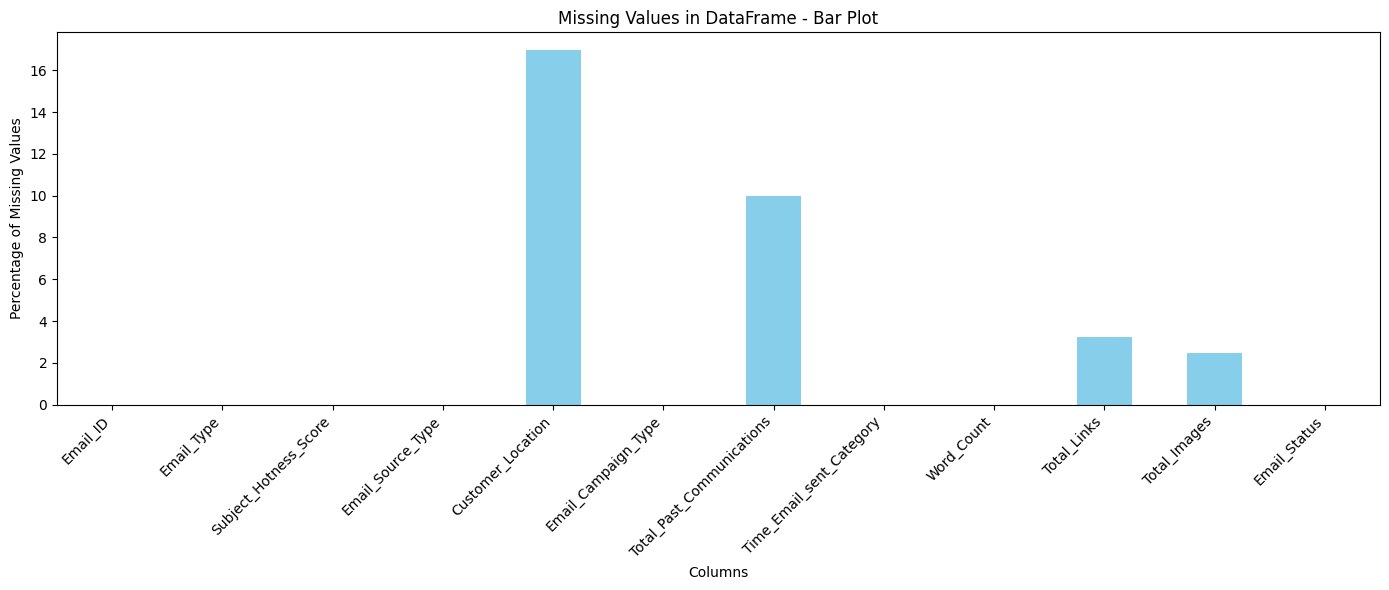

In [20]:
# Visualizing the missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Create a bar plot
plt.figure(figsize=(14, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values in DataFrame - Bar Plot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Customer_Location is a categorical feature but it cannot be blindly imputed with its mode since a large number of observations have missing values in it. We cannot remove this column or these observations as it will lead to a loss of information. None of the other features has any possibility of causing some effect on customer location or vice versa. So, it is difficult to find a value to impute in relation to other features.

* For now, we will skip this and later decide how to handle the missing values after we get a clear picture about the correlation between Customer_Location and Email_Status.

* Total_Past_Communications is a numerical feature. Lets check its density plot to choose the value we need to impute missing values.

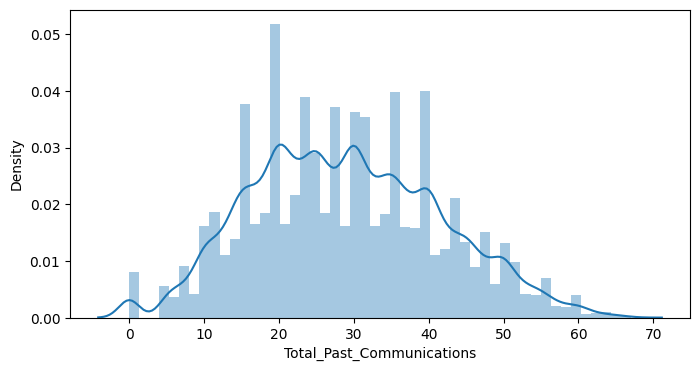

In [21]:
# create a density plot to show the distribution of values in Total_Past_Communications
generate_density_plot(df, 'Total_Past_Communications')

Total_Past_Communications is having an almost normal distribution. We can use mean or median can be used to impute missing values. But before that we need to check whether some other important features affect its values since a large number of observations have missing values in it.

<Axes: xlabel='Total_Past_Communications', ylabel='Email_Source_Type'>

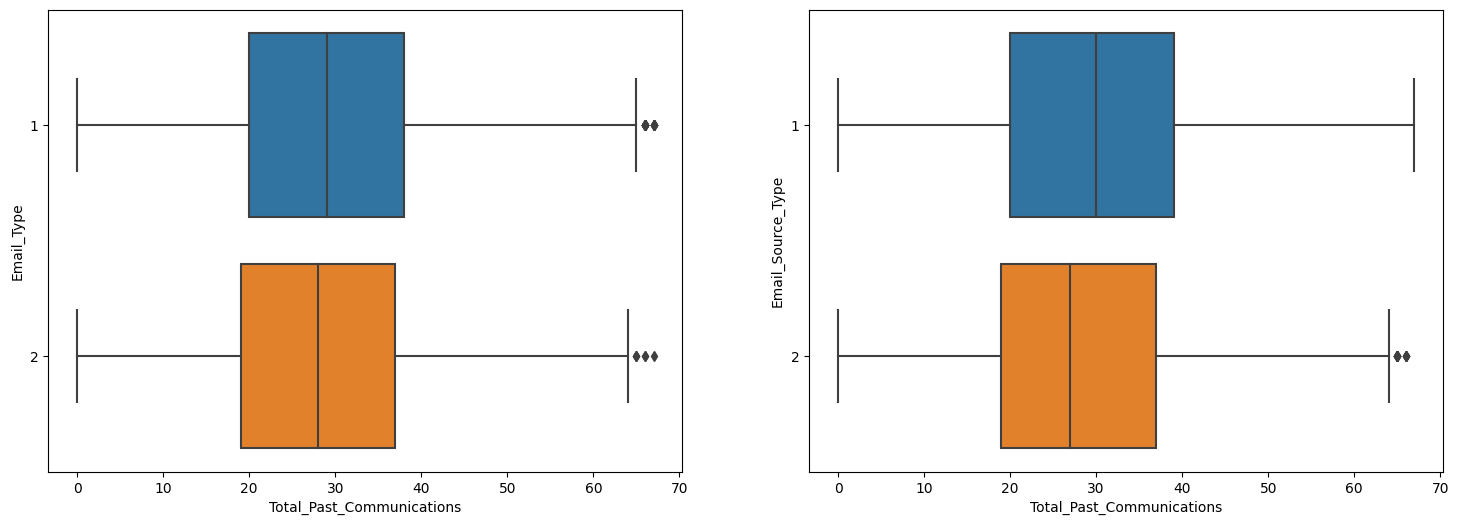

In [22]:
# generate box plots to show the distribution of Total_Past_Communications in each category of Email_Type and Email_Source_Type
fig, axes = plt.subplots(1,2, figsize=(18,6))
sns.boxplot(ax=axes[0], data=df, x='Total_Past_Communications', y="Email_Type", orient='h')
sns.boxplot(ax =axes[1], data=df, x='Total_Past_Communications', y='Email_Source_Type', orient='h')

In [23]:
# Let's check outliers in Total_Past_Communications
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Past_Communications')
print(f"Count of outliers in Total_Past_Communications is {outliers} \nPercentage wise it is {percentage}%")

Count of outliers in Total_Past_Communications is 27 
Percentage wise it is 0.04%


It has very less outliers. So we can impute the missing values with its mean.



In [24]:
df['Total_Past_Communications'].fillna(value=df['Total_Past_Communications'].mean(), inplace=True)

**Total_Links is also a numerical feature. Lets check its density plot to choose the value we need to impute missing values.**

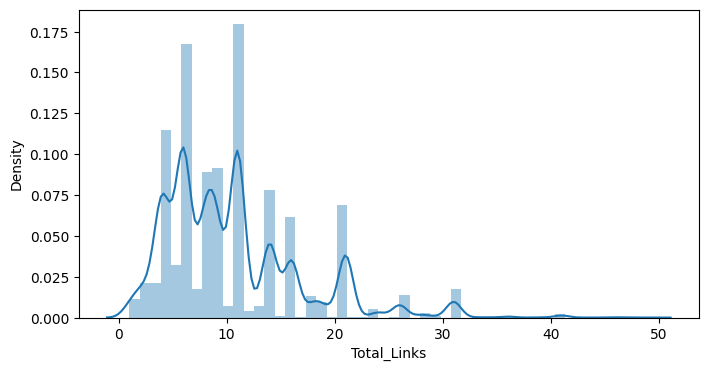

In [25]:
# create a density plot to show the distribution of values in Total_Links
generate_density_plot(df, 'Total_Links')

In [26]:
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Links')
print(f"Count of outliers in Total_Links is {outliers} \nPercentage wise it is {percentage}%")

Count of outliers in Total_Links is 1608 
Percentage wise it is 2.35%


The distribution of Total_Links is positively skewed. Since only a small number of observations have missing values in it, checking for the influence of other features is not necessary and it is safe to impute missing values with mode or median. Mean can be avoided as it has outliers.

Considering that "Total_Links" represents a count of links in an email campaign, it might be appropriate to use the **median** because count data is sometimes be right-skewed due to a few campaigns having a significantly higher number of links.

In [27]:
# filling the missing values with median
df.Total_Links.fillna(value=df.Total_Links.median(), inplace=True)

**Total_Images is again a numerical feature. Lets check its density plot to choose the value we need to impute missing values.**

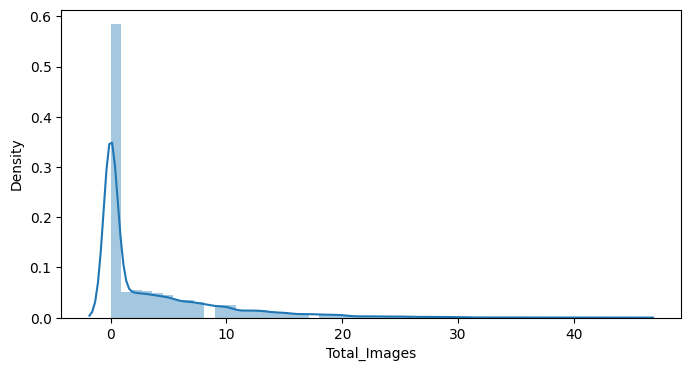

In [77]:
generate_density_plot(df,'Total_Images')

In [96]:
outliers, percentage = get_outlier_count_and_percentage(df,'Total_Images')
print(f"Count of outliers in Total_Images is {outliers} \nPercentage wise it is {percentage}%")

Count of outliers in Total_Images is 5585 
Percentage wise it is 8.17%


In [80]:
df.Total_Images.nunique()

45

The distribution of Total_Images is positively skewed. Since only a small number of observations have missing values in it, it is safe to impute missing values with mode or median. Since number of Unique elements in Total_Images Column are 45 and also there are more than 8% of outliers present in this features. So imputing missing value with Median is appropriate because plot can be seen positively skewed as well. The median is a robust measure of central tendency and is not influenced by extreme values.

In [82]:
df.Total_Images.fillna(value=df.Total_Images.median(), inplace=True)

Now missing values for Customer_Location

In [113]:
get_missing_count_and_percenetage(pd.DataFrame(df.Customer_Location))

Customer_Location contains 11595 null values. Percentage wise it is 16.96% 


In [92]:
df.Customer_Location.value_counts()

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64

Imputing missing values for feature Customer_Location is not as easy as imputing with median or mode or mean at all. Because Location is something which may belong to geological indication. As of now we are not imputing missing values for feature Custome_Location.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [28]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [29]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [30]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [31]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [32]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [33]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [34]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [35]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [36]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [37]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [38]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [39]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [40]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [41]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [42]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [45]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [46]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [47]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [48]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [49]:
# Expand Contraction

#### 2. Lower Casing

In [50]:
# Lower Casing

#### 3. Removing Punctuations

In [51]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [52]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [53]:
# Remove Stopwords

In [54]:
# Remove White spaces

#### 6. Rephrase Text

In [55]:
# Rephrase Text

#### 7. Tokenization

In [56]:
# Tokenization

#### 8. Text Normalization

In [57]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [58]:
# POS Taging

#### 10. Text Vectorization

In [59]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [60]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [61]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [62]:
# Transform Your data

### 6. Data Scaling

In [63]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [64]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [65]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [66]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [67]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [70]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [71]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [76]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***